## Machine Learning Intermedio - Kaggle

## 1a parte:


### Importamos librerias:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#modelos
from sklearn.ensemble import RandomForestRegressor

### Importamos los datos:

In [2]:
#path
general_path = r"C:\Users\sephc\Python\home_data_for_ml"

# Lectura de datos
X_full = pd.read_csv(general_path + '/train.csv', index_col='Id')
X_test_full = pd.read_csv(general_path + '/test.csv', index_col='Id')



In [3]:
# Obtain target and predictors
y = X_full.SalePrice
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = X_full[features].copy()
X_test = X_test_full[features].copy()

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

### Valores faltantes

In [4]:
X_train.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
619,11694,2007,1828,0,2,3,9
871,6600,1962,894,0,1,2,5
93,13360,1921,964,0,1,2,5
818,13265,2002,1689,0,2,3,7
303,13704,2001,1541,0,2,3,6


In [5]:
# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='mae', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

Para seleccionar el mejor modelo, definimos la funcion "score_model()". Esta funcion regresa el MAE usando los datos de validacion.El mejor modelo será el que de el menor MAE.

In [6]:
# Function for comparing different models
def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)


modelos = []
maes = []
for i in range(0, len(models)):
    mae = score_model(models[i])
    modelos.append("model_%d" % (i+1))
    maes.append(mae)
    print("Model %d MAE: %d" % (i+1, mae))



Model 1 MAE: 24015
Model 2 MAE: 23740
Model 3 MAE: 23528
Model 4 MAE: 23996
Model 5 MAE: 23706


#### Definimos un diccionario donde las key son los modelos y los valores sus respectivos MAE:

In [7]:
print(modelos)
print(maes)
z = list(zip(modelos,maes))
print(z)

modelo_mae = {modelos:maes for modelos,maes in zip(modelos,maes)}

print(modelo_mae)

['model_1', 'model_2', 'model_3', 'model_4', 'model_5']
[24015.492818003917, 23740.979228636657, 23528.78421232877, 23996.676789668687, 23706.672864217904]
[('model_1', 24015.492818003917), ('model_2', 23740.979228636657), ('model_3', 23528.78421232877), ('model_4', 23996.676789668687), ('model_5', 23706.672864217904)]
{'model_1': 24015.492818003917, 'model_2': 23740.979228636657, 'model_3': 23528.78421232877, 'model_4': 23996.676789668687, 'model_5': 23706.672864217904}


In [8]:
#mejor modelo de acuerdo a su mae
besto_model = min(modelo_mae, key=modelo_mae.get)

besto_model

'model_3'

### Definimos un modelo

In [9]:
my_model = RandomForestRegressor( random_state=0) 

1. Entrenamos el modelo
2. Hacemos predicciones con los datos test
3. Para cada ID diferente obtenemos una prediccion de su precio

In [10]:
# Fit the model to the training data
my_model.fit(X, y)

# Generate test predictions
preds_test = my_model.predict(X_test)

# Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output

,Id,SalePrice
0,1461,121501.00
1,1462,154652.00
2,1463,182625.00
3,1464,179018.00
4,1465,188362.58
...,...,...
1454,2915,86251.00
1455,2916,89371.00
1456,2917,160942.02
1457,2918,127412.00


___

___

## 2a parte:
### Valores Faltantes
#### Diferentes enfoques:

 1. Eliminar columnas con valores faltantes
 2. Imputación
 3. Imputación incluyendo información de los valores faltantes
 
Podemos saber cual de estos enfoques es el más apropiado dependiendo del error absoluto promedio (MAE) en cada caso.

### Trabajaremos con los datos melbourne (melb_data.csv)

In [11]:
melbourne_datapath = r"C:\Users\sephc\Python\melbourne_data"

data = pd.read_csv(melbourne_datapath + "/melb_data.csv")

In [12]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


 Podemos observar que contiene muchos datos faltantes

In [13]:
# Select target
y = data.Price

# To keep things simple, we'll use only numerical predictors
melb_predictors = data.drop(['Price'], axis=1)
X = melb_predictors.select_dtypes(exclude=['object'])

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

### Observemos que existen muchos datos faltantes

<AxesSubplot:>

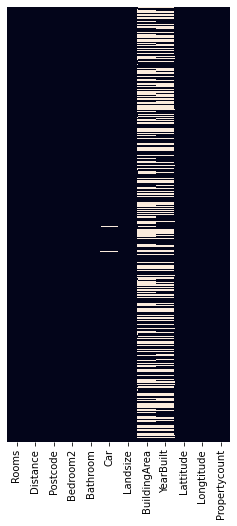

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(4, 8)

sns.heatmap(X_train.isnull(),yticklabels= False,cbar=False)

### Definimos una funcion para medir la calidad de cada metodo
Definimos la funcion score_dataset() para comparar los diferentes metodos al lidiar con valores faltantes. Esta funcion reporta el error absoluto promedio (mean absolute error (MAE)) de un modelo random forest.

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

### Metodo 1 : eliminar columnas

In [16]:
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop columns with missing values):
183550.22137772635


### Metodo 2: Imputacion

In [17]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

print("MAE from Approach 2 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE from Approach 2 (Imputation):
178166.46269899711


### Metodo 3: extension de Imputacion

In [18]:
# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

print("MAE from Approach 3 (An Extension to Imputation):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid))

MAE from Approach 3 (An Extension to Imputation):
178927.503183954


### Para resumir:

In [19]:
print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

print("MAE from Approach 2 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

print("MAE from Approach 3 (An Extension to Imputation):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid))

MAE from Approach 1 (Drop columns with missing values):
183550.22137772635
MAE from Approach 2 (Imputation):
178166.46269899711
MAE from Approach 3 (An Extension to Imputation):
178927.503183954


El metodo más conveniente en este caso es la imputación.

## Preparación de variables categóricas

1. Eliminar las variables categóricas
2. Label Encoding: Le asigna a cada valor categorico unico un número entero
3. One-Hot Encoding: Crea nuevas columnas que indican la presencia o ausencia de cada valor posible en los datos.

In [20]:
# Separamos target de features (predictores)
y = data.Price
X = data.drop(['Price'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# Drop columns with missing values (simplest approach)
cols_with_missing = [col for col in X_train_full.columns if X_train_full[col].isnull().any()] 
X_train_full.drop(cols_with_missing, axis=1, inplace=True)
X_valid_full.drop(cols_with_missing, axis=1, inplace=True)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

Score from Approach 1 (Drop Categorical Variables)
We drop the object columns with the select_dtypes() method.

In [22]:
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop categorical variables):
175703.48185157913


In [23]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Type', 'Method', 'Regionname']


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

Score from Approach 1 (Drop Categorical Variables)
We drop the object columns with the select_dtypes() method.

In [25]:
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop categorical variables):
175703.48185157913


In [26]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])

print("MAE from Approach 2 (Label Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

MAE from Approach 2 (Label Encoding):
165936.40548390493


In [27]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

MAE from Approach 3 (One-Hot Encoding):
166089.4893009678


### En resumen:

In [28]:
print("MAE from Approach 1 (Drop categorical variables):", score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

print("MAE from Approach 2 (Label Encoding):", score_dataset(label_X_train, label_X_valid, y_train, y_valid)) 

print("MAE from Approach 3 (One-Hot Encoding):", score_dataset(OH_X_train, OH_X_valid, y_train, y_valid)) 

MAE from Approach 1 (Drop categorical variables): 175703.48185157913
MAE from Approach 2 (Label Encoding): 165936.40548390493
MAE from Approach 3 (One-Hot Encoding): 166089.4893009678


En este caso el mejor metodo es Label Encoding aunque en general casi siempre se opta por el OneHot Encoding.

___
## Pipelines 

In [53]:
# Separate target from predictors
y = data.Price
X = data.drop(['Price'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()


#### Construimos el Pipeline en 3 pasos

Paso 1: Definimos los pasos del preprocesamiento

Usamos ColumnTransformer para juntar los pasos del preprocesamiento:

1. Imputes missing values in numerical data
2. Imputes missing values and applies a one-hot encoding to categorical data.

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

Paso 2: Definimos el modelo

Definimos un modelo RandomForestRegressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)

Paso 3: Creamos y evaluamos el Pipeline

1. Con el pipeline, preprocesamos los datos training y entrenamos el modelo en una sola linea de codigo.
2. Con el pipeline, suministramos las features sin procesar en X_valid al comando predict(), el pipeline automaticamente preprocesa las features antes de generar predicciones (sin el pipeline, tenemos que recordar hacer el preproceso en los datos de validacion antes de hacer predicciones. )


In [32]:
from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 160679.18917034855


## Cross-Validation

Usar coross-validation nos lleva a una mejor medida de la calidad del modelo.

In [33]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):", scores.mean())

MAE scores:
 [207273.036228   195544.72890525 186907.59467108 152084.99219493
 158236.49133232]
Average MAE score (across experiments): 180009.368666316


#### Funcion get_score()

Para obtener mejores resultados vamos a usar una funcion que reporta un promedio (sobre 3 capas de cross-validation) MAE de un pipeline haciendo cambiar el parametro de n_estimators. Anteriormente se usó n_estimators = 100.

In [34]:
def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    # Preprocessing for numerical data
    numerical_transformer = SimpleImputer(strategy='constant')

    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])

    # Bundle preprocessing for numerical and categorical data
    preprocessor = ColumnTransformer( transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(n_estimators, random_state=0))])
    
    scores = -1* cross_val_score(pipeline, X, y, cv =3, scoring ="neg_mean_absolute_error")
    return scores.mean()

#### Resultados para cada parametro:

In [35]:
resultados = {i:get_score(i) for i in [50*n for n in range(5,9)]}


In [36]:
n_estimators_best = min(resultados, key=resultados.get)
print(n_estimators_best)

350


Visualizamos los resultados:

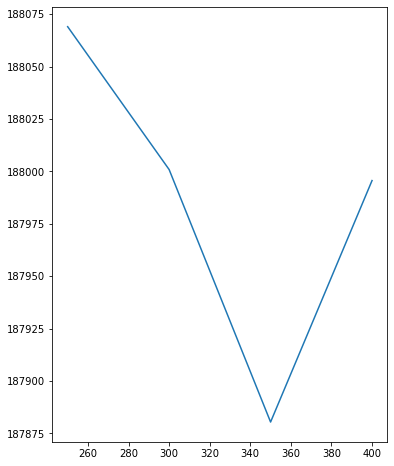

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
fig.set_size_inches(6, 8)
plt.plot(list(resultados.keys()), list(resultados.values()))

plt.show()

#### Mejor parametro:

Entonces definiendo el parametro n_estimators como el minimo que encontramos:

In [38]:
best_model = RandomForestRegressor(n_estimators=n_estimators_best, random_state=0)

best_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', best_model)
                             ])

# Preprocessing of training data, fit model 
best_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
best_preds = best_pipeline.predict(X_valid)

# Evaluate the model
best_score = mean_absolute_error(y_valid, best_preds)
print(f'MAE:{best_score} with best n_estimators: {n_estimators_best}')

MAE:159834.5664929919 with best n_estimators: 350


## XGBoost (extreme gradient boosting)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
melbourne_datapath = r"C:\Users\sephc\Python\melbourne_data"
data = pd.read_csv(melbourne_datapath + "/melb_data.csv")

# Select subset of predictors
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]

# Select target
y = data.Price

# Separate data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

#### Entrenamos el modelo y calculamos su MAE

In [2]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 236647.07938604566


#### Tomando en cuenta los parametros utiles para XGBoost: 

In [4]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=2)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 241041.66894790131


___

## 3a parte:

## Importancia de permutación

Para calcular la importancia de cada variable al valor target realizamos el siguiente procedimiento:
1. Entrenar el modelo
2. Permutar los valores en una columna, hacer predicciones usando el dataset resultante. Usar las predicciones y los valores target reales para calcular el cambio en la funcion de pérdida debido a la permutacion. El deterioro de este proceso mide la importancia de la variable que fue permutada.
3. Se regresan los datos al orden original. Ahora se repite el paso 2 con la siguiente columna en el df, hasta calcular la importancia de cada columna.

Usaremos los datos "FIFA 2018 Statistics.csv" como ejemplo:

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

path = r"C:\Users\sephc\Python\fifa-2018" +"\FIFA 2018 Statistics.csv"
data = pd.read_csv(path)
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(train_X, train_y)

In [3]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1750 ± 0.0848,Goal Scored
0.0500 ± 0.0637,Distance Covered (Kms)
0.0437 ± 0.0637,Yellow Card
0.0187 ± 0.0500,Off-Target
0.0187 ± 0.0637,Free Kicks
0.0187 ± 0.0637,Fouls Committed
0.0125 ± 0.0637,Pass Accuracy %
0.0125 ± 0.0306,Blocked
0.0063 ± 0.0612,Saves
0.0063 ± 0.0250,Ball Possession %


## Fuera de Kaggle: GridSearchCV
Queremos encontrar el valor de n_estimators usando gridsearch que nos de un menor MAE. El valor que se uso en el calculo anterior es de n_estimators = 400 con cv = 5 (con cv = 3 , n_estimators = 350).

In [52]:
#from sklearn.pipeline import make_pipeline
#from sklearn.model_selection import GridSearchCV

In [57]:
# Separate target from predictors
#y = data.Price
#X = data.drop(['Price'], axis=1)

# Divide data into training and validation subsets
#X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
#categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
#                        X_train_full[cname].dtype == "object"]

# Select numerical columns
#numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
#my_cols = categorical_cols + numerical_cols
#X_train = X_train_full[my_cols].copy()
#X_valid = X_valid_full[my_cols].copy()

In [48]:
parametrosn = [50*n for n in range(1,11)]
parametrosn

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

In [49]:
paramgrid = dict(n_estimators = parametrosn)

paramgrid

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]}

In [50]:
#clf = make_pipeline(preprocessor, 
#                    GridSearchCV(RandomForestRegressor(),
#                                 param_grid=paramgrid,
#                                 cv=3,
#                                 refit=True))